# Linear Regression

In [2]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

## Simple Linear Regression

Mathematically

$$Y \approx \beta_0 + \beta_1X + \epsilon$$

$Y$ - is the quantitative response/prediction (What we want to predict)

$X$ - single predictor variable.

We assume that there is **approximately** a linear relationship between $X$ and $Y$.

Where we sometimes say *we are regressing $Y$ on $X$ (or $Y$ onto $X$).


For example for the Advertising data $X$ may represent `TV` advertising and $Y$ represent `sales`, then we regress `sales` onto `TV` by fitting the model

$$sales \approx \beta_0 + \beta_1TV$$

In [16]:
ad_data = pd.read_csv('../data/Advertising.csv', index_col = "Unnamed: 0") 
print(ad_data.shape)
ad_data[['TV', 'sales']].head(3)

(200, 4)


,TV,sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3


$\beta_0$ and $\beta_1$ are 2 unkown constants that represent the *intercept* and *slope* terms of the linear model.

Together $\beta_0$ and $beta_1$ are known as the model **_coefficients/parameters_**.

$\beta_0$ - Y intercept i.e. mean value of Y when X = 0

$\beta_1$ slope of $X$ i.e. how much we expect $Y$ to change as $x$ increases or decreases

Once we have used our training data to produce estimates of $\hat{\beta_0}$ and $\hat{\beta_1}$ for the model coefficients we can predict futre sales on the basis of a particular value of `TV` advertising by computing

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$

where $\hat{y}$ indicates a single prediction of $Y$ on the basis of $X=x$

**Note** that  $\space\hat{}\space$   is used to denote estimated values for unknown coefficients of predicted value of the response

### Estimating the Coefficients

#### Advertising Data Scatter Plot

In [18]:
ad_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


[Text(0.5, 0, 'newspaper'), Text(0, 0.5, 'Sales')]

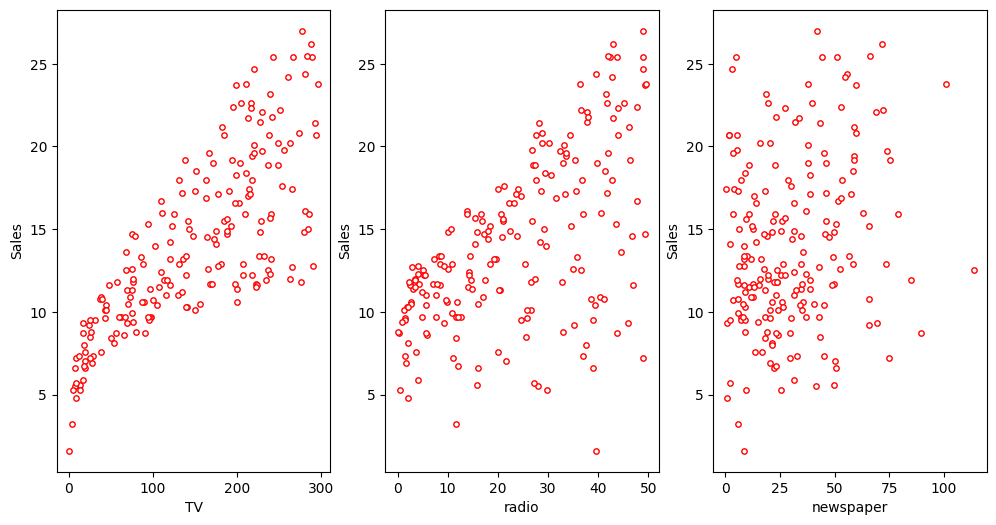

In [45]:
Tv_slope, Tv_intercept = np.polyfit(ad_data[])



fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize = (12, 6))
ax1.scatter(ad_data['TV'], ad_data['sales'], s=15, c='1', edgecolors='r');
ax1.set(xlabel="TV", ylabel="Sales")
ax2.scatter(ad_data['radio'], ad_data['sales'], s=15, c='1', edgecolors='r');
ax2.set(xlabel="radio", ylabel="Sales")
ax3.scatter(ad_data['newspaper'], ad_data['sales'], s=15, c='1', edgecolors='r');
ax3.set(xlabel="newspaper", ylabel="Sales")

#### Sample Scatter Plot with regression line

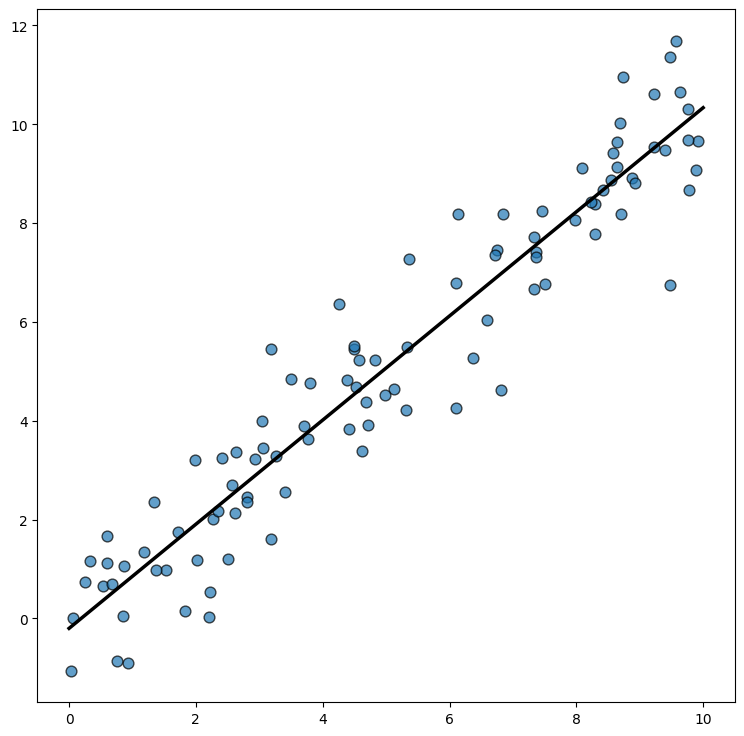

In [13]:
# Generate sample data
rng = np.random.default_rng(1234)
# 100 Uniformly distributed floats
x = rng.uniform(0, 10, size=100)
# Augment x by another normal distributed floats
y = x + rng.normal(size = 100)

# Initialize layout
fig, ax = plt.subplots(figsize=(9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with
# np.polyfit returns a slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create a sequence of 100 numbers of 0 - 10
xseq = np.linspace(0, 10, num=100)

# print(b, a)
# print(xseq)

# Plot regression
# xseq -> x coordinates, a+b*xseq -> y coordinate 
ax.plot(xseq, a+b*xseq, color="k", lw=2.5);

### Statsmodel

In [2]:
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm